# WeatherAUS

# 1.- PRESENTACIÓN DEL NEGOCIO Y CONTEXTO

El caso presentado habla de las descripciones que tiene Australia tanto en su clima, como también en su largo, ancho, cantidad de población, ciudades y representaciones geográficas destacadas (Montañas, ríos, superficie). 

Es importante considerar para el caso que casi dos tercios del territorio australiano sufren de escases en las corrientes de aguas, siendo la principal cuenca fluvial la Murray-Darling, por otro lado, se debe saber que Australia cuenta con 4 diferentes climas que son justamente templados o cálidos sufriendo de insuficiencia de lluvias. 

Se nos entrega un dataset con las diferentes observaciones meteorológicas de Australia, con la finalidad de poder explorar y representar de la mejor manera posible los datos, generando nueva información y conocimientos útiles de lo entregado, destacando como variable objetivo RainTomorrow (¿Mañana lloverá?) y una variable de riesgo RIKS_MM que significa la cantidad de lluvia en milímetros. Con estos datos se generará un análisis exploratorio con la finalidad de dejarlos ordenados por relevancia y con sus respectivos gráficos.

# 2.- ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style="whitegrid")
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedKFold, ParameterGrid
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
import multiprocessing
warnings.filterwarnings('ignore')

## Realizamos la Carga de Datos.

In [2]:
data = pd.read_csv('weatherAUS.csv', low_memory=False, index_col=0)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No


In [3]:
data.shape

(142193, 23)

### El set de datos está compuesto de 142.193 observaciones meteorológicas diarias en Australia. además, se incluyen 24 características para cada uno de ellos.

## Revisión de tipos de Datos.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 2008-12-01 to 2017-06-24
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 

En los tipos de datos tenemos 5 variables categóricas y los restantes de tipo numérico las cuales son datos continuos.

In [5]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Indicadores Estadísticos o Medidas Estadísticas por cada una de las variables.

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


 # Mapa de Correlación

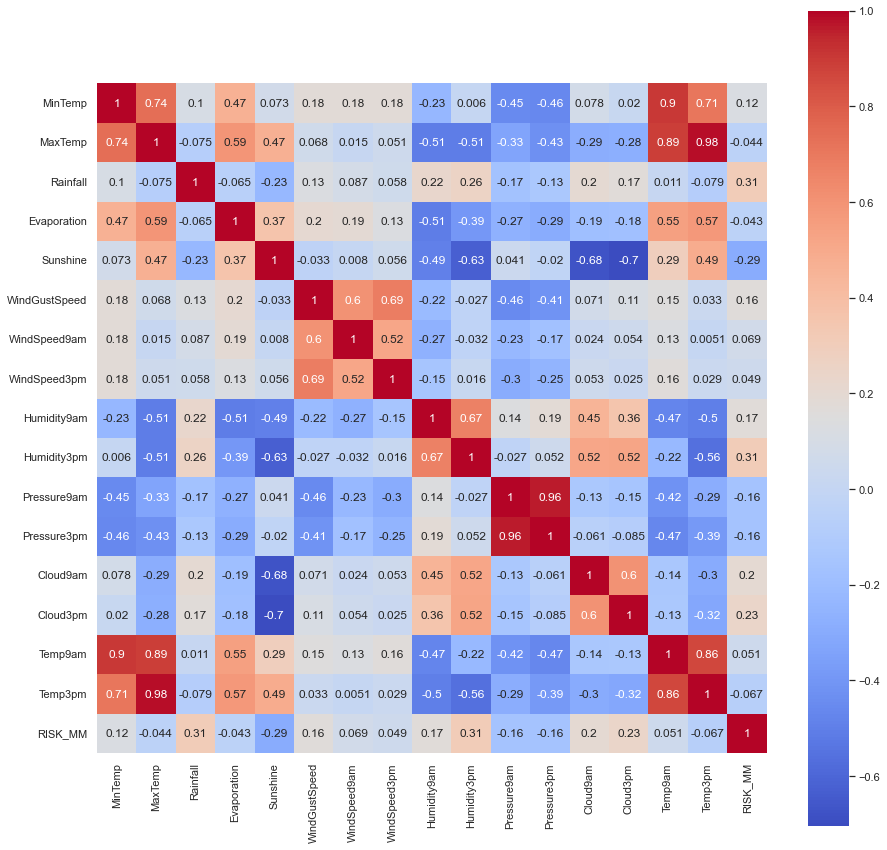

In [7]:
corr1 = data.corr(method ='pearson')
plt.figure(figsize=(15,15))  
sns.heatmap(data=corr1,square=True, annot=True,cmap='coolwarm')
plt.savefig('Mapa de Correlación.png');

Este es el Mapa de correlación de las Variables numéricas sin realizar Cambios.

In [8]:
data.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Se consulta para saber si existen valores null en todo el data frame en donde la mayor cantidad de datos nulos están en la variable Sunshine abarcando un 47,6% del total de los datos lo que podría afectar la muestra si consideráramos borrar los registros con este valor nulo.

In [9]:
data.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [10]:
Categoricas = [i for i in data.columns if data[i].dtypes =='O']
print ('Variables Categoricas:',Categoricas)

Variables Categoricas: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
Numericas = [i for i in data.columns if i not in Categoricas]
print ('Variables numericas :', Numericas)

Variables numericas : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


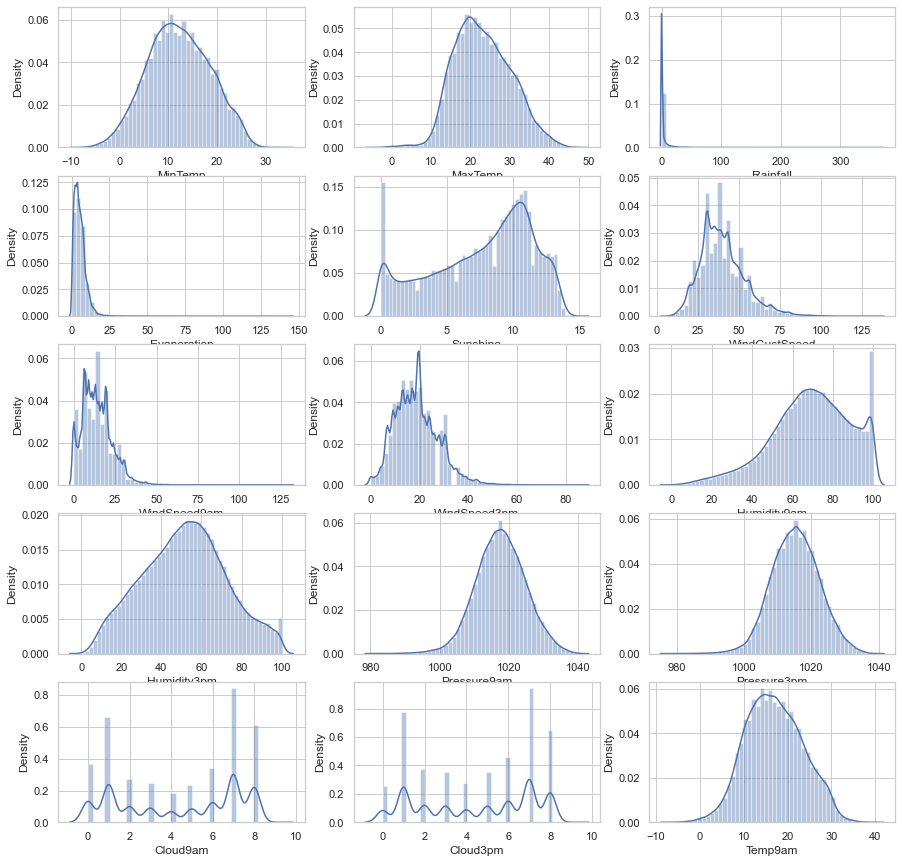

In [12]:
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(data[Numericas[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1; 
    plt.savefig('distribution_de_variables_numericas.png')
    plt.show()
plotHist()

En estos gráficos podemos ver la distribución de las variables numéricas antes de realizar intervención de datos.

['RainToday', 'WindDir9am', 'WindGustDir', 'WindDir3pm']


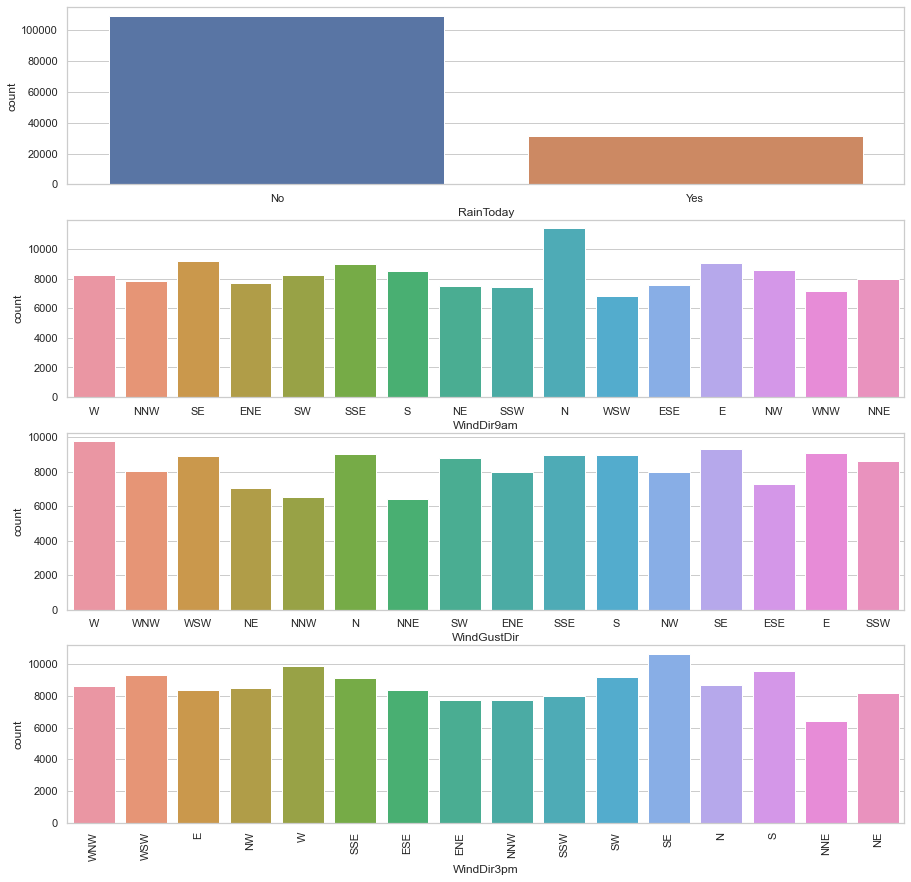

In [13]:
categoricalPlot = ['RainToday', 'WindDir9am','WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
print(categoricalPlot)
c=0
while c<=3:
    sns.countplot(data[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.savefig('variablescategoricas.png')
plt.show()

En estos gráficos podemos ver la distribución de las variables categóricas antes de realizar intervención de datos.

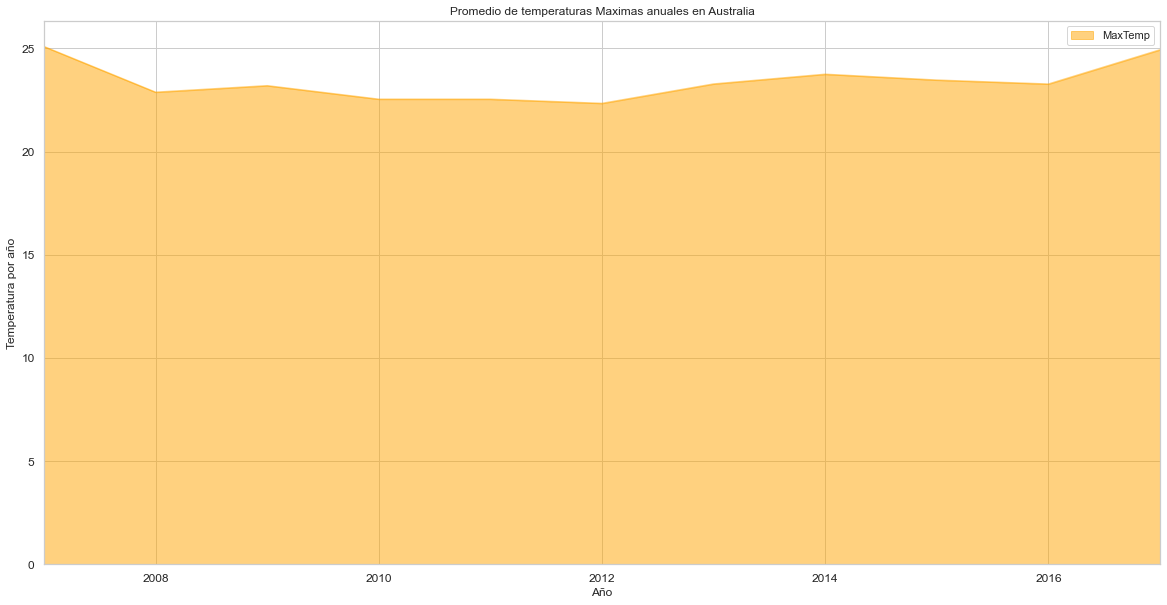

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
TempMax = data
TempMax = TempMax.fillna(0)
TempMax.index = pd.to_datetime(TempMax.index)
promedio = TempMax.groupby(pd.Grouper(freq='Y')).mean()
promedio.plot(kind='area', fontsize=12, grid=True, stacked=False, y='MaxTemp', color='orange', 
              xlabel='Año', ylabel='Temperatura por año', 
              title='Promedio de temperaturas Maximas anuales en Australia')
plt.savefig('Promedio de temperaturas Maximas anuales en Australia.png');


Creamos un Grafico donde podemos observar el promedio de las temperaturas máximas por año.

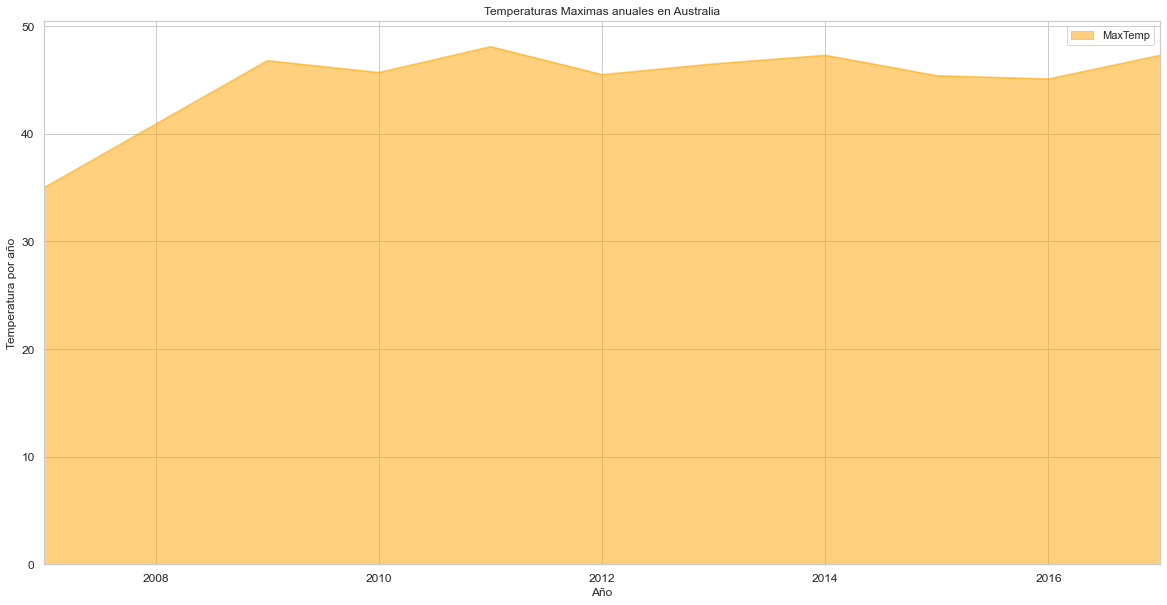

In [15]:
TempMax = data
TempMax = TempMax.fillna(0)
TempMax.index = pd.to_datetime(TempMax.index)
Maxima = TempMax.groupby(pd.Grouper(freq='Y')).max()
Maxima.plot(kind='area', fontsize=12, grid=True, stacked=False, y='MaxTemp', color='orange', 
              xlabel='Año', ylabel='Temperatura por año', 
              title='Temperaturas Maximas anuales en Australia')
plt.savefig('Temperaturas Maximas anuales en Australia.png');

En este gráfico podemos observar el PIC de temperaturas por año, Donde podemos ver que el Año 2011 se registró la mayor temperatura.

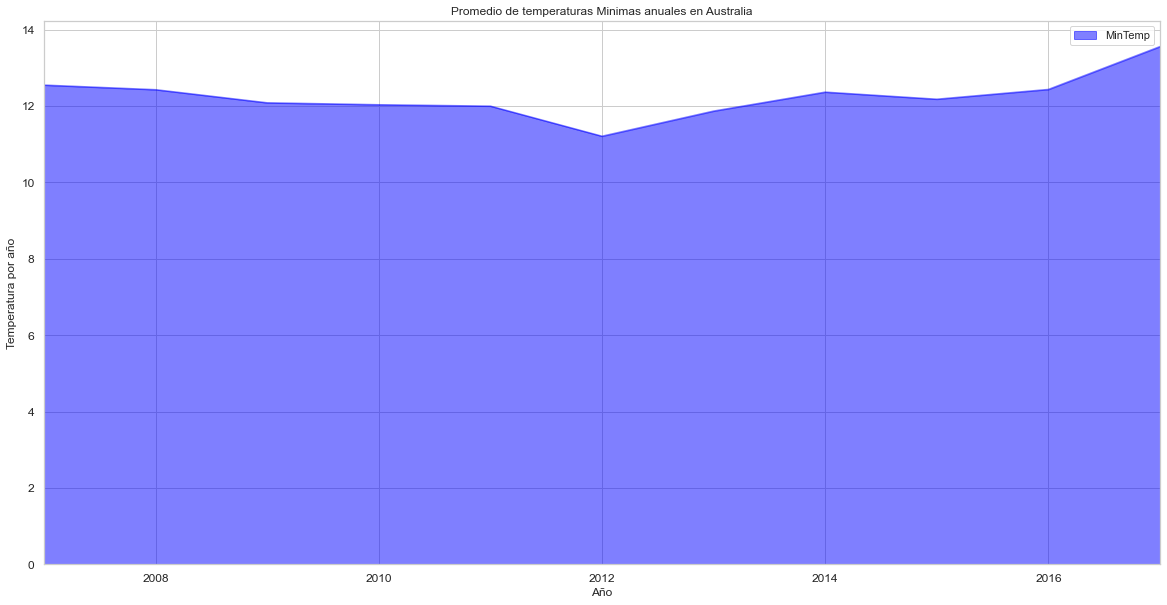

In [16]:
TempMin = data
TempMin = TempMax.fillna(0)
TempMin.index = pd.to_datetime(TempMin.index)
promedio = TempMin.groupby(pd.Grouper(freq='Y')).mean()
promedio.plot(kind='area', fontsize=12, grid=True, stacked=False, y='MinTemp', color='blue', 
              xlabel='Año', ylabel='Temperatura por año', 
              title='Promedio de temperaturas Minimas anuales en Australia')
plt.savefig('Promedio de temperaturas Minimas anuales.png');

En este grafico podemos observar el promedio de temperaturas mínimas por año, podemos ver que el año con el promedio de con menor temperatura se registro el 2012.

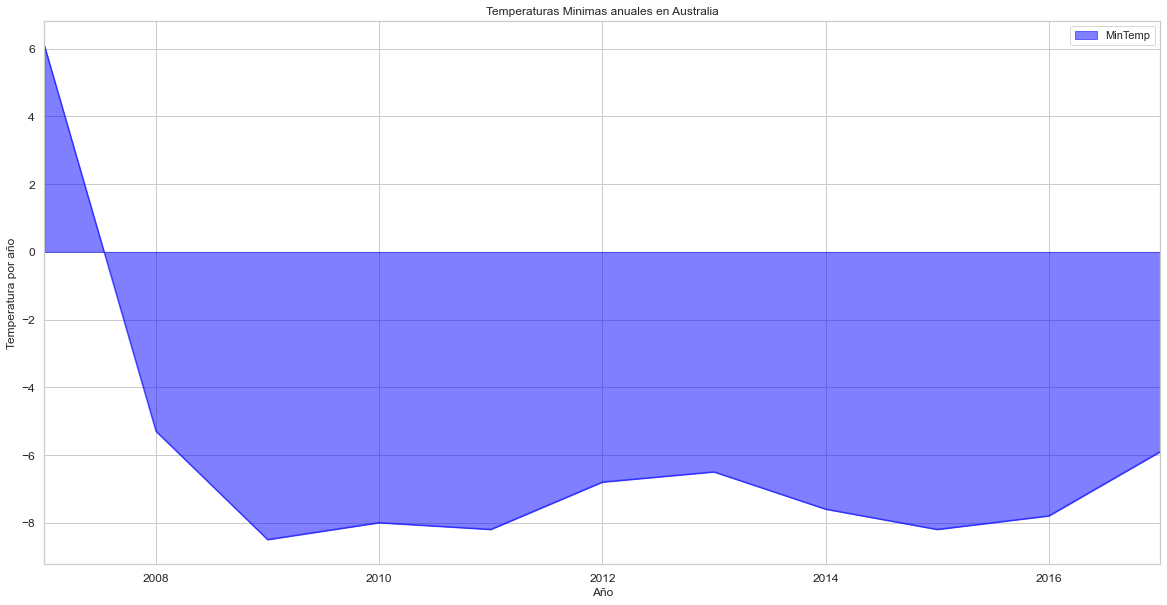

In [17]:
TempMin = data
TempMin = TempMax.fillna(0)
TempMin.index = pd.to_datetime(TempMin.index)
Minima = TempMin.groupby(pd.Grouper(freq='Y')).min()
Minima.plot(kind='area', fontsize=12, grid=True, stacked=False, y='MinTemp', color='blue', 
              xlabel='Año', ylabel='Temperatura por año', 
              title='Temperaturas Minimas anuales en Australia')
plt.savefig('Temperaturas Minimas anuales en Australia.png');

En Este grafico podemos observar las temperaturas mínimas registradas en MinTemp al año, y vemos que el año 2009 se registró la menor temperatura.

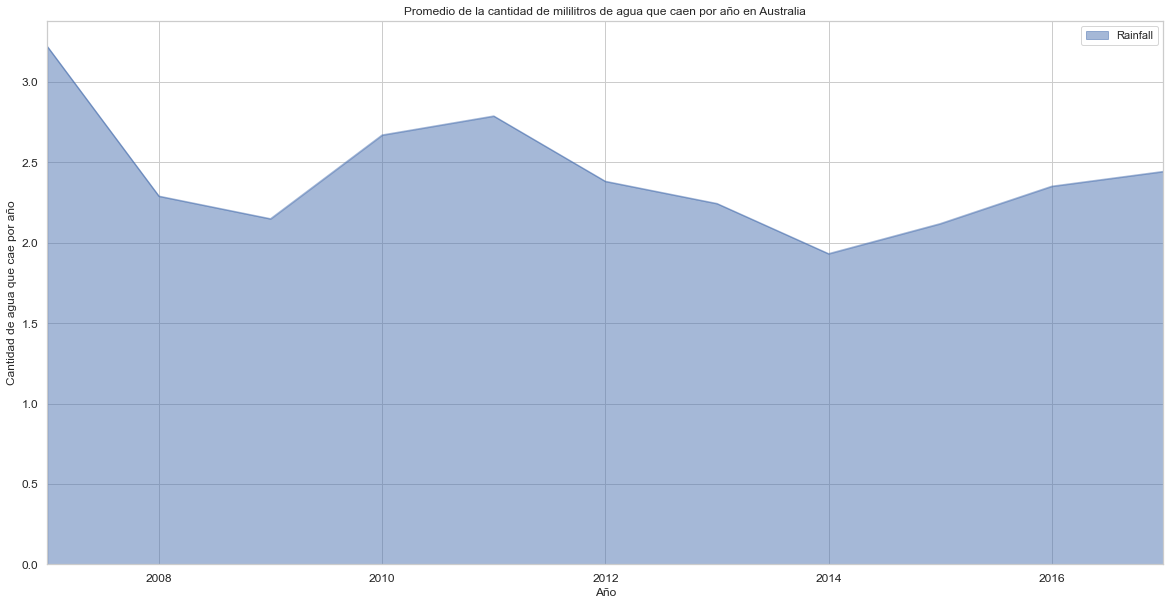

In [18]:
cantidadLluvia = data
cantidadLluvia = cantidadLluvia.fillna(0)
cantidadLluvia.index = pd.to_datetime(cantidadLluvia.index)
promedio = cantidadLluvia.groupby(pd.Grouper(freq='Y')).mean()
promedio.plot(kind='area', fontsize=12, grid=True, stacked=False, y='Rainfall', 
              xlabel='Año', ylabel='Cantidad de agua que cae por año', 
              title='Promedio de la cantidad de mililitros de agua que caen por año en Australia')
plt.savefig('Promedio de la cantidad de mililitros de agua que caen por año.png');

Nos centramos en poner la cantidad de mililitros de agua que caen por año para saber cuál de estos años fue el más seco y como se puede ver la tabla fue en el año 2014 pero viendo siempre que estos datos van variando.

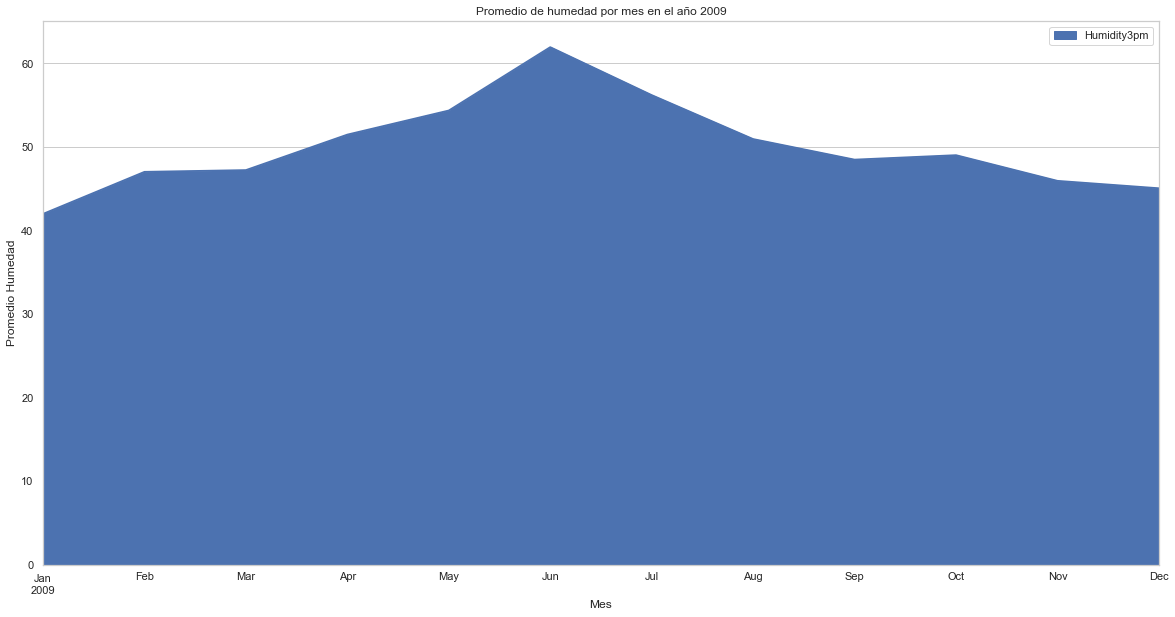

In [19]:
humedad = data.query("Date >= '2009-01-01' and Date <= '2009-12-31'")
humedad.index = pd.to_datetime(humedad.index)
PromedioHumedad = humedad.groupby(pd.Grouper(freq='M')).mean()
PromedioHumedad.plot(kind='area', y='Humidity3pm', xlabel='Mes', ylabel='Promedio Humedad',
                    title='Promedio de humedad por mes en el año 2009')
plt.savefig('Promedio de humedad por mes en el año 2009.png');

Podemos observar en el gráfico el promedio de humedad durante el año 2009 donde vemos que el mes de junio es el más húmedo.

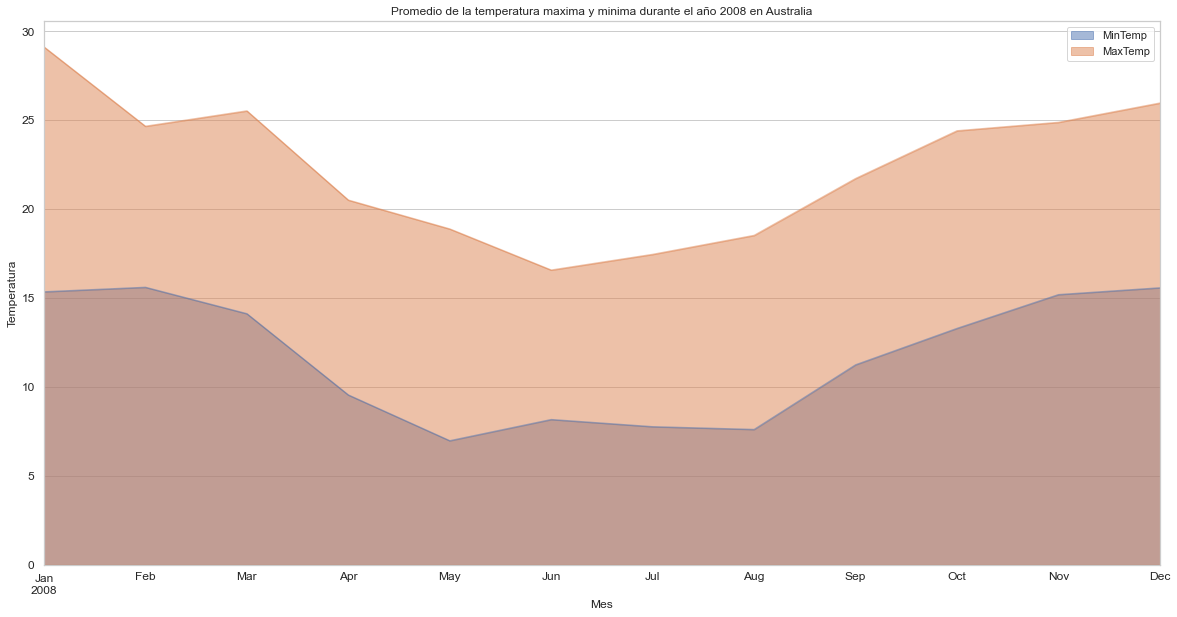

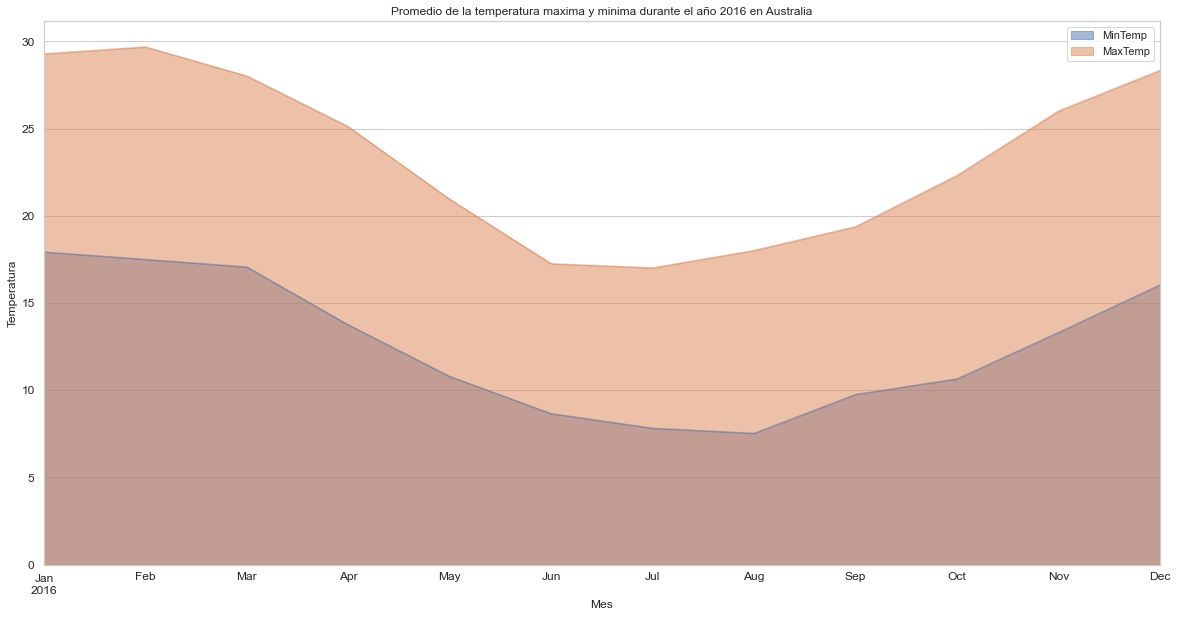

In [20]:
temp_ciudad = data.query("Date >= '2008-01-01' and Date <= '2008-12-31'")
temp_ciudad.index = pd.to_datetime(temp_ciudad.index)
PromedioMens = temp_ciudad.groupby(pd.Grouper(freq='M')).mean()
MinMaxTemp = PromedioMens[['MinTemp','MaxTemp']]
MinMaxTemp.plot(kind="area", fontsize=12, grid=True, stacked=False, ylabel='Temperatura', 
                xlabel='Mes', title='Promedio de la temperatura maxima y minima durante el año 2008 en Australia')
plt.savefig('Promedio de la temperatura maxima y minima durante el año 2008.png');

temp_ciudad = data.query("Date >= '2016-01-01' and Date <= '2016-12-31'")
temp_ciudad.index = pd.to_datetime(temp_ciudad.index)
PromedioMens = temp_ciudad.groupby(pd.Grouper(freq='M')).mean()
MinMaxTemp = PromedioMens[['MinTemp','MaxTemp']]
MinMaxTemp.plot(kind="area", fontsize=12, grid=True, stacked=False, ylabel='Temperatura', 
                xlabel='Mes', title='Promedio de la temperatura maxima y minima durante el año 2016 en Australia')
plt.savefig('Promedio de la temperatura maxima y minima durante el año 2016.png');

En estos dos gráficos analizamos la cantidad de grados que hubo en el 2008 y en el 2016, entendiendo que en el año 2016 se obtuvo una temperatura máxima mayor a la del 2008 y también la temperatura mínima fue mayor en el 2016 por los meses de Enero hasta Junio pero en agosto hasta noviembre de ese año fue inferior a la del 2008.


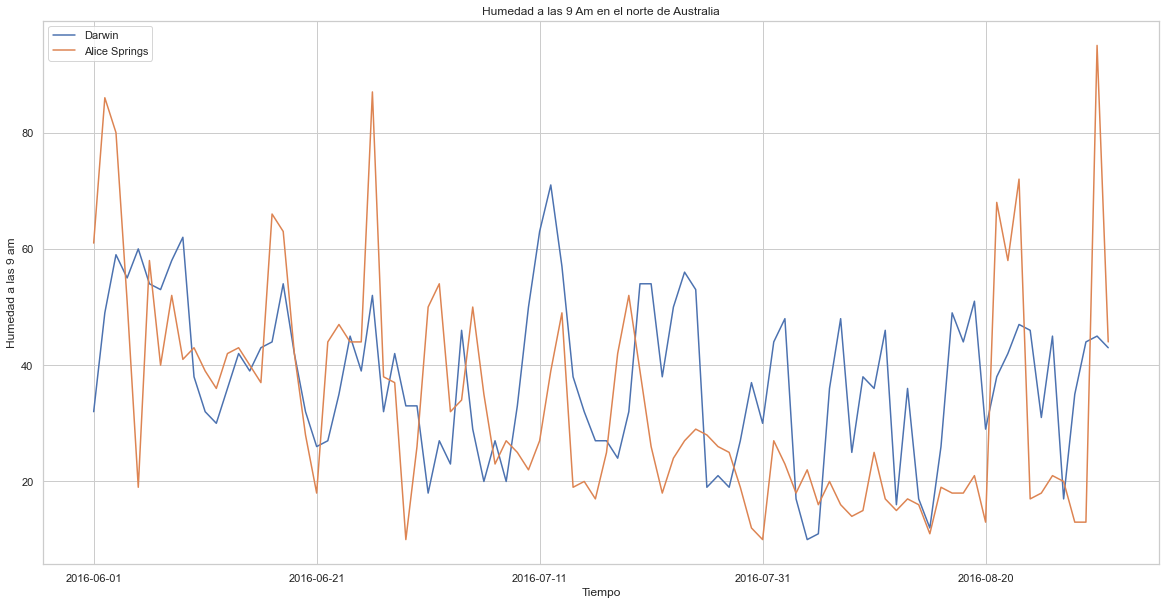

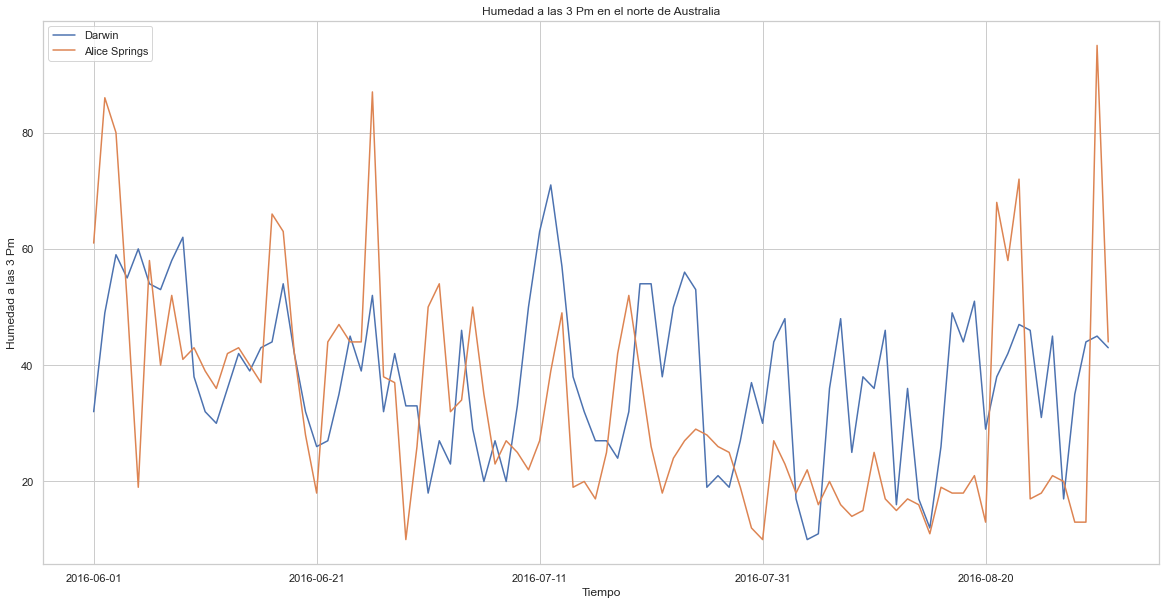

In [21]:

darwin = data.query("Location == 'Darwin' & Date >= '2016-06-01' and Date <= '2016-08-31'")
alicesprings = data.query("Location == 'AliceSprings' & Date >= '2016-06-01' and Date <= '2016-08-31'")

ax = darwin.plot(kind='line', y='Humidity3pm')
alicesprings.plot(title='Humedad a las 9 Am en el norte de Australia', kind='line', y='Humidity3pm', 
                  ylabel='Humedad a las 9 am', xlabel='Tiempo', ax=ax, grid=True, stacked=False)

ax.legend(["Darwin", "Alice Springs"]);
plt.savefig('Humedad a las 9 Am en el norte de Australia.png');

darwin = data.query("Location == 'Darwin' & Date >= '2016-06-01' and Date <= '2016-08-31'")
alicesprings = data.query("Location == 'AliceSprings' & Date >= '2016-06-01' and Date <= '2016-08-31'")

ax = darwin.plot(kind='line', y='Humidity3pm')
alicesprings.plot(title='Humedad a las 3 Pm en el norte de Australia', kind='line', y='Humidity3pm', 
                  ylabel='Humedad a las 3 Pm', xlabel='Tiempo', ax=ax, grid=True, stacked=False)

ax.legend(["Darwin", "Alice Springs"]);
plt.savefig('Humedad a las 3 Pm en el norte de Australia.png');


Con este gráfico analizamos la cantidad de humedad que hay en el ambiente a las 9 Am y a las 3 Pm en el norte de Australia el año 2016 en la época de verano, se concentra mucho más a la humedad en Darwin que es un pueblo cercano a la playa, mientras que en Alice Springs que es una zona más al centro del norte de Australia la humedad aunque se mantiene a las 9am durante las 3pm baja considerablemente, y baja bastante para el final del verano, ósea desde los meses de julio y agosto, con lo que podemos considerar que la humedad baja bastante un ejemplo del posible cambio climático por el que pasa el planeta.

In [22]:
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig('Histograma MaxTemp.png');

<Figure size 1440x720 with 0 Axes>

Acá realizamos un histograma de la variable MaxTemp en donde notamos que la mayor cantidad de registros se encuentra en el rango de 10 a 40 grados.


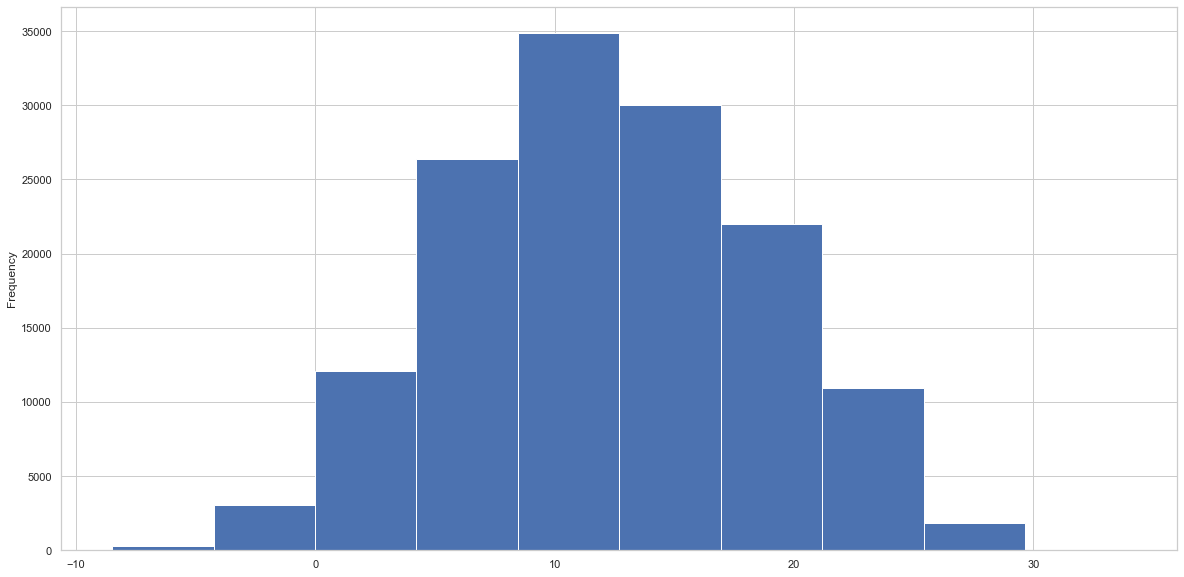

In [23]:
data['MinTemp'].plot.hist()
plt.savefig('Histograma MinTemp.png');

Acá realizamos un histograma de la variable MinTemp en donde notamos que la mayor cantidad de registros se encuentra en el rango de 5 a 25 grados.

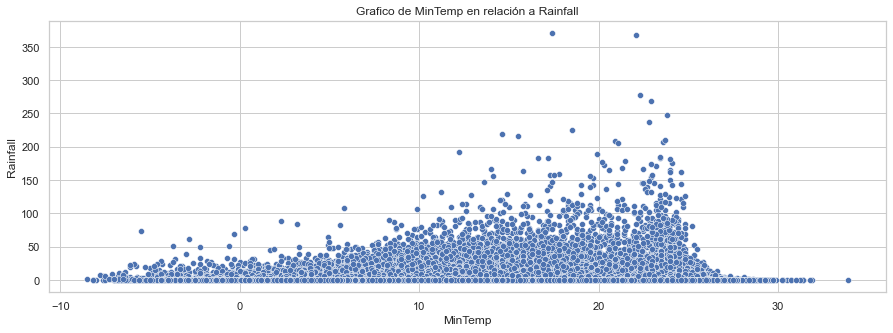

In [24]:
plt.rcParams["figure.figsize"] = (15,5) 
sns.scatterplot('MinTemp', 'Rainfall', data=data).set(title='Grafico de MinTemp en relación a Rainfall', 
                                                  xlabel='MinTemp', ylabel='Rainfall')
plt.savefig('Grafico de MinTemp en relación a Rainfall.png');

En este gráfico quisimos verificar la cantidad de datos en relación a la temperatura mínima con el riesgo de MM, considerando que a menor temperatura han caído más MM de agua lluvia, lo que podría darnos una idea de los outlayers.

In [25]:
df = pd.read_csv('weatherAUS.csv')

# 3.- INTERVENCION DE DATOS

In [26]:
df.drop('RISK_MM', axis=1, inplace = True)

Procedemos a la eliminación de RISK_MM, esto debido a que la variable estaba muy relacionada con la variable objetivo y es de tipo variable predictivo. Esto provoca un sesgo de los datos.

## 3.1.- Tratamiento de Valores Nulos y Outliers en Variables Numéricas.

### En los valores nulos de las columnas MinTemp, MaxTemp tomamos la media según ciudades rellenando valores nulos.

In [27]:
numerical = df._get_numeric_data().columns
categorical = set(df.columns) - set(numerical)
loc_for_miss = df["Location"].unique().tolist()
ls = []
def removeNull(columns):
    j=0
    while j<=len(columns)-1:
        for i in range(len(loc_for_miss)):    
            ls.append(str(df.loc[df["Location"] == loc_for_miss[i], columns[j]].median())) #great outliers so used median

        for i in range(len(loc_for_miss)):
            df.loc[df["Location"] == loc_for_miss[i], columns[j]] = df.loc[df["Location"] == loc_for_miss[i], columns[j]].fillna(ls[i])
        j+=1
        df[columns] = df[columns].astype(float)
        
removeNull(numerical)

## Comprobación de valores Outliers en columnas numéricas

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


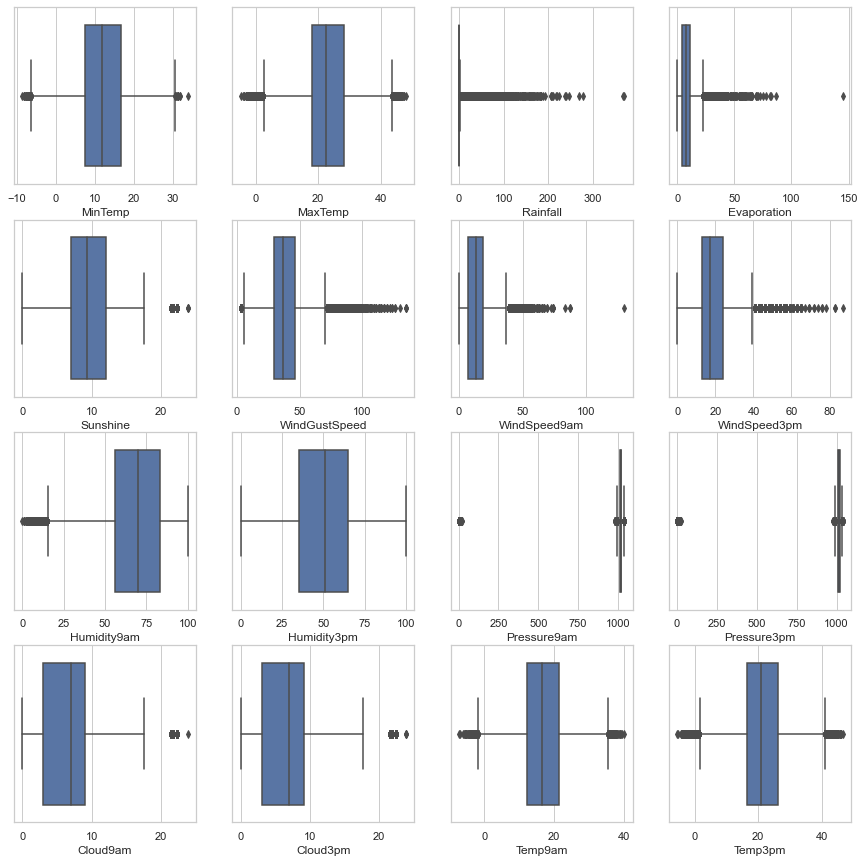

In [28]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('before_removing_outliers_from_numerical_columns.png')
plt.show()

## Eliminacion de Outliers

In [29]:
lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = df[numerical[i]].quantile(0.25)
        q3 = df[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


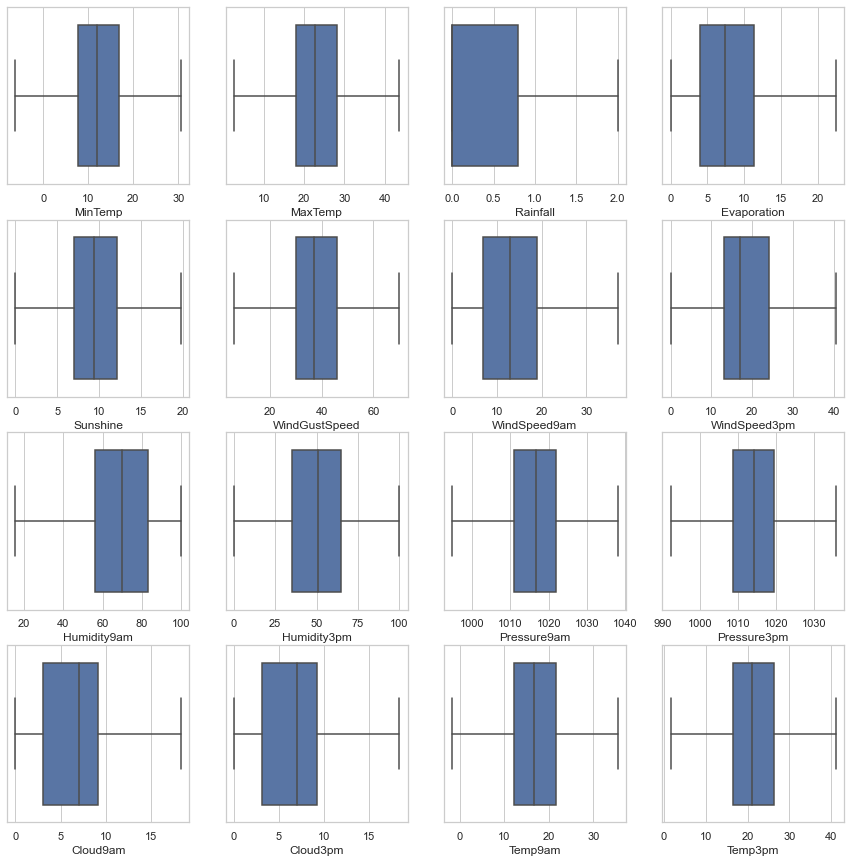

In [30]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('after_removing_outliers_from_numerical_columns.png')
plt.show()

### Aqui podemos ver graficamente el estado de los outliers despues de la eliminacion de estos.

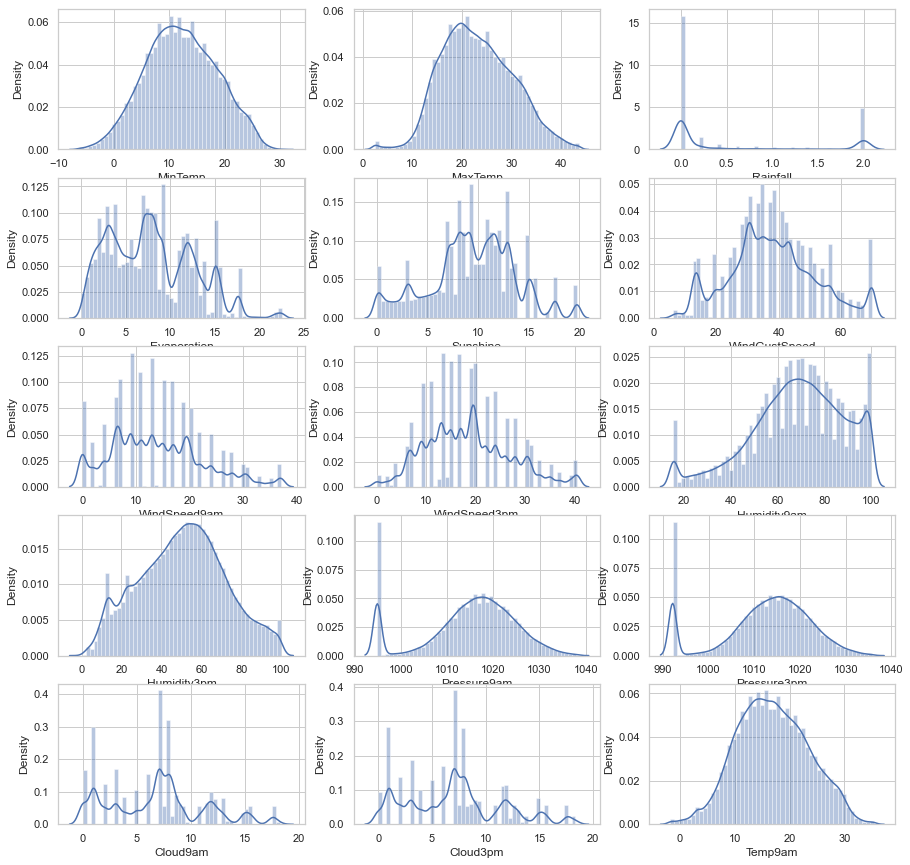

In [31]:
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(df[numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1;
    plt.savefig('distribution_after_removing_outliers_from_numerical_columns.png')
    plt.show()
plotHist()

En estos gráficos podemos ver la distribución de las variables numéricas después de realizar intervención de datos.

## 3.2.- Tratamiento de Valores Nulos en variables Categoricas.

### Eliminación de valores perdidos de datos categóricos
comprobamos si los valores de las columnas en cada ubicación son nan. Si es así, reemplázamos por una ubicación de búsqueda geográfica cerca de ciudades determinadas 
- Primero reemplazamos Newcastle está cerca de sydney con modo = W
  Albuny esta cerca de Perth con el modo =sw
- El resto lo reemplazamos con la moda 


In [32]:
# solo para la columna WindGustDir
ls_WGD = []
loc_for_miss = df["Location"].unique()
for j in range(len(loc_for_miss)):
    df_allNanWGD = df.loc[df["Location"] == loc_for_miss[j]]
    if(df_allNanWGD["WindGustDir"].isnull().all()):
        ls_WGD.append(loc_for_miss[j])

In [33]:
# Primero tomamos solo estas ciudades
# 'Newcastle' esta cerca de "Sydnay" con el modo W,
# 'Albany' esta cerca de "Perth" con el modo SW

# ingresando W en Newcastle para la columna WindGustDir
df.loc[df["Location"] == "Newcastle", "WindGustDir"] = "W"
df.loc[df["Location"] == "Albany", "WindGustDir"] = "SW"

In [34]:
#moda en variables categóricas wrt cities
numerical = df._get_numeric_data().columns
categorical = ['RainToday', 'WindDir9am', 'WindDir3pm']
loc_for_miss = ['Albury','BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree','Newcastle','NorahHead','NorfolkIsland',
                'Penrith','Richmond','Sydney','SydneyAirport','WaggaWagga','Williamtown','Wollongong','Canberra',
                'Tuggeranong','MountGinini','Ballarat','Bendigo','Sale','MelbourneAirport','Melbourne','Mildura',
                'Nhil','Portland','Watsonia','Dartmoor','Brisbane','Cairns','GoldCoast','Townsville','Adelaide',
                'MountGambier','Nuriootpa','Woomera','Albany','Witchcliffe','PearceRAAF','PerthAirport','Perth',
                'SalmonGums','Walpole','Hobart','Launceston','AliceSprings','Darwin','Katherine','Uluru']
ls = []
ls_allNAN = []
def removeNull(columns):
    for j in range(len(columns)):
        ls = []
        for i in range(len(loc_for_miss)): 
            ls.append(df.loc[df["Location"] == loc_for_miss[i], columns[j]].mode()[0])
        for i in range(len(loc_for_miss)):
            df.loc[df["Location"] == loc_for_miss[i], columns[j]] = df.loc[df["Location"] == loc_for_miss[i], columns[j]].fillna(ls[i])
        df[columns] = df[columns].astype(object)
    
removeNull(categorical)

### Transformacion de datos

Para la variable objetivo se utilizará LabelEncoder, de esta manera nos facilitara la entrega de resultados

In [35]:
le = LabelEncoder()
df['RainTomorrow']= le.fit_transform(df['RainTomorrow'])
df.RainTomorrow.value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

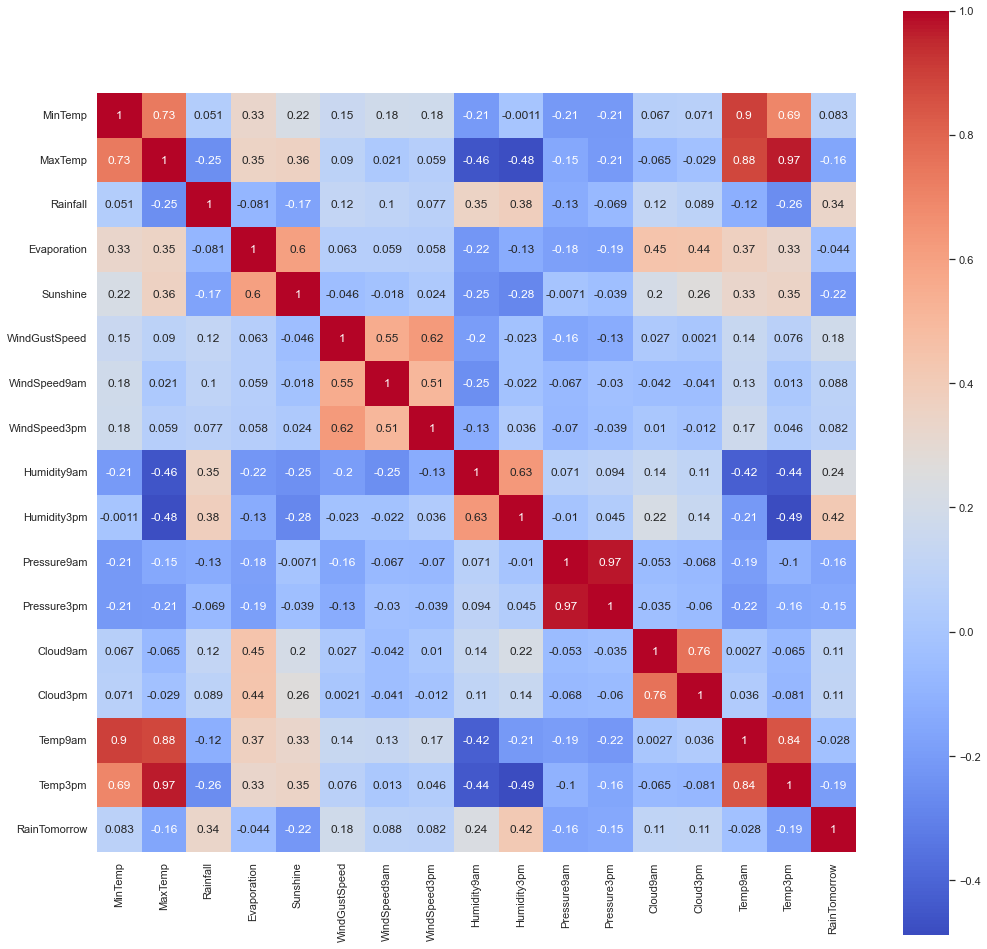

In [36]:
corr4 = df.corr(method ='pearson')
plt.figure(figsize=(17,17)) 
sns.heatmap(data=corr4,square=True, annot=True,cmap='coolwarm')
plt.savefig('Mapa de Correlación data Nueva.png');

aquí podemos ver el mapa de correlación de las Variables numéricas con nuestra Variable objetivo RainTomorrow.

In [37]:
corr4['RainTomorrow'].sort_values(ascending=False)[1:13]

Humidity3pm      0.416697
Rainfall         0.336045
Humidity9am      0.237739
WindGustSpeed    0.184156
Cloud3pm         0.112325
Cloud9am         0.110002
WindSpeed9am     0.088276
MinTemp          0.083489
WindSpeed3pm     0.081941
Temp9am         -0.027985
Evaporation     -0.043699
Pressure3pm     -0.148144
Name: RainTomorrow, dtype: float64

aquí podemos ver la correlación y la variable más cercana a nuestra variable objetivo es Humidity3pm y la que más se aleja es Pressire3pm

## Separación de fechas en valores únicos

In [38]:
#Adding extra columns by splitting date column
df['Year']=[d.split('-')[0] for d in df.Date]
df['Year'].astype(float)
df['Month']=[d.split('-')[1] for d in df.Date]
df['Day']=[d.split('-')[2] for d in df.Date]
df.drop(columns=["Date"], axis=1, inplace=True)

- Realizamos la separación de las fechas para poder tomarlas y distribuirlas según sea necesario. 

- Realizamos la separación de las fechas en Días, Meses y Años. Con el objetivo de poder trabajar con las variables de manera separadas y obtener resultados más exactos.

- Procedemos a la eliminación de la variable Date ya que es un dato innecesario, se realizo la separación de las fechas para obtener un mejor modelo predictivo. 

In [39]:
# Aplicamos one hot encoding en RainToday, WindGustDir, WindDir9am, WindDir3pm, Location.
df_WindGustDir = pd.get_dummies(df["WindGustDir"], prefix="1")
df_WindDir9am = pd.get_dummies(df["WindDir9am"], prefix="2")
df_WindDir3pm = pd.get_dummies(df["WindDir3pm"], prefix="3")
df_RainToday = pd.get_dummies(df["RainToday"])
location_ohe = pd.get_dummies(df["Location"])
df_new = pd.concat([df, df_WindGustDir, df_WindDir9am, df_WindDir3pm, df_RainToday, location_ohe], axis=1)
df_new.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Location"], axis=1, inplace=True)

Tomamos el promedio de las columnas y creamos una nueva columna

In [40]:
#tomamos el promedio de las columnas y creamos una nueva.
df_new["AveTemp"] = (df_new["MinTemp"]+df_new["MaxTemp"])/2
df_new["WindSpeed12pm"] = (df_new["WindSpeed3pm"]+df_new["WindSpeed9am"])/2
df_new["Humidity12pm"] = (df_new["Humidity3pm"]+df_new["Humidity9am"])/2
df_new["Pressure12pm"] = (df_new["Pressure3pm"]+df_new["Pressure9am"])/2
df_new["Cloud12pm"] = (df_new["Cloud3pm"]+df_new["Cloud9am"])/2
df_new["Temp12am"] = (df_new["Temp3pm"]+df_new["Temp9am"])/2

# 4.- Dividir datos de prueba y entrenamiento

In [41]:
X = df_new.loc[:,df_new.columns != "RainTomorrow"]
y = df_new.loc[:,["RainTomorrow"]]

In [42]:
y.RainTomorrow.value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(113754, 124)
(28439, 124)
(113754, 1)
(28439, 1)


In [44]:
print(Xtrain.shape)
print(ytrain.shape)

(113754, 124)
(113754, 1)


## 4.1.- NORMALIZACIÓN.

In [45]:
scaler = StandardScaler()
#estandarización en datos entrenados
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

In [46]:
XtrainSTD.shape

(113754, 124)

# 5.- MODELOS

## 5.1.- Análisis de componentes principales PCA

In [47]:
pca = PCA(n_components=50) #n = número de componentes
pca.fit(XtrainSTD)
XtrainPCA = pca.transform(XtrainSTD)
XtestPCA = pca.transform(XtestSTD)
XtrainPCA.shape

(113754, 50)

In [48]:
pca.explained_variance_ratio_

array([0.06122614, 0.03677899, 0.03174077, 0.02943943, 0.02500544,
       0.01897963, 0.01676501, 0.01591801, 0.0153472 , 0.0147348 ,
       0.01372596, 0.01335688, 0.01280775, 0.01203903, 0.01157279,
       0.0112325 , 0.01089492, 0.0108521 , 0.01050823, 0.01005508,
       0.00995647, 0.00972736, 0.00966255, 0.0095643 , 0.00946987,
       0.00922552, 0.00920185, 0.0091207 , 0.00902748, 0.00900496,
       0.00893274, 0.00878605, 0.00873407, 0.00869876, 0.00863557,
       0.00855129, 0.00845433, 0.00833352, 0.00830766, 0.00827243,
       0.00823842, 0.00819838, 0.00818224, 0.00813436, 0.00811232,
       0.00808979, 0.00804019, 0.00800894, 0.00791212, 0.0079077 ])

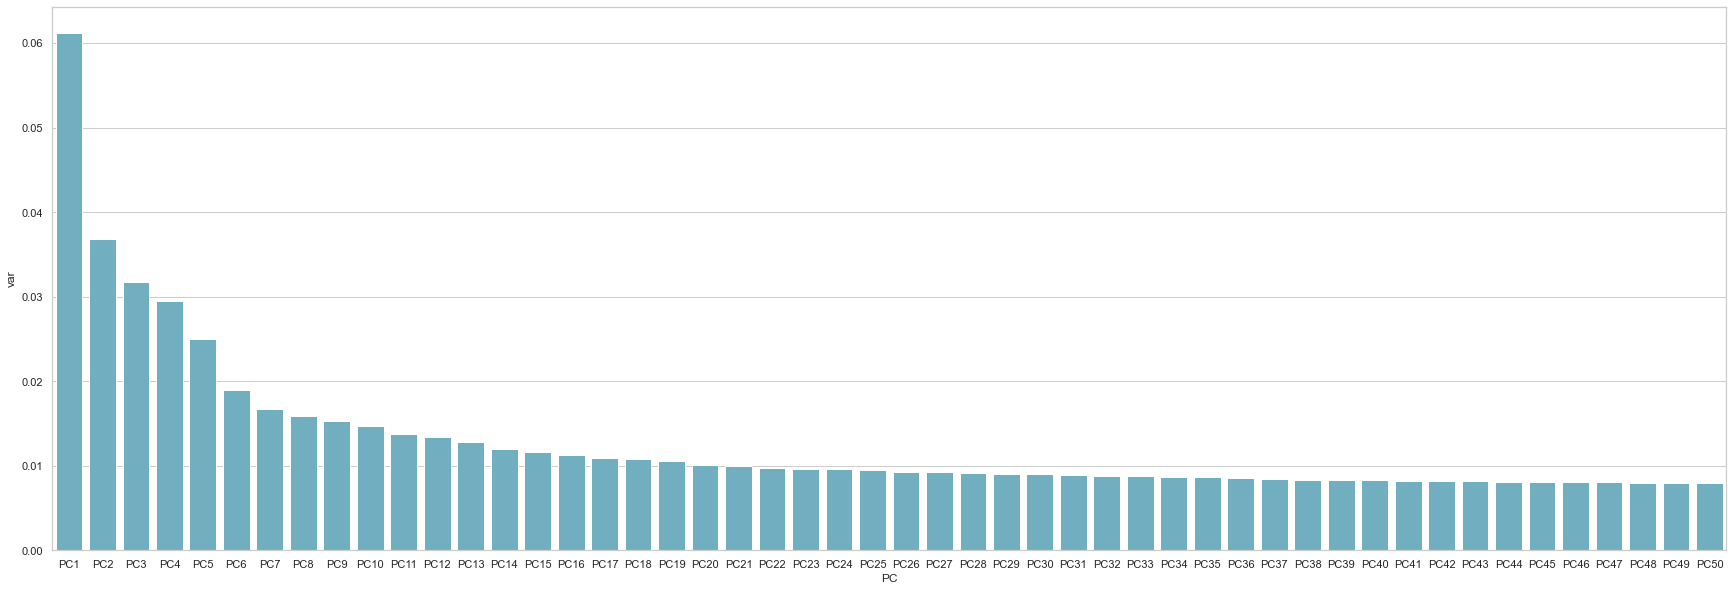

In [49]:

PC = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
     'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
     'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50']
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,10))
sns.barplot(x='PC',y="var", data=pca_df, color="c");
plt.savefig('PCA.png')

Teniendo en cuenta todas las columnas, hay muy poca variación en ellas.

# 5.2.- Random Forest Classifier

In [50]:
rf = RandomForestClassifier(random_state=0)
parameters = {'bootstrap': [True, False],
              'min_samples_split':[2, 3, 4],
              'criterion':['entropy', 'gini'],
              'n_estimators':[10, 20]
             }
grid_search1 = GridSearchCV(estimator=rf, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=10, n_jobs=-1)
grid_search1 = grid_search1.fit(XtrainSTD, ytrain.values.ravel())

## Metricas - Random Forest Classifier

In [51]:
print("Mejor Parametro : ",grid_search1.best_params_)
print("Mejor AUC-ROC : ", grid_search1.best_score_)

Mejor Parametro :  {'bootstrap': False, 'criterion': 'entropy', 'min_samples_split': 4, 'n_estimators': 20}
Mejor AUC-ROC :  0.8779381850921327


In [52]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_split= 4, n_estimators= 20, random_state=0)
rf.fit(XtrainSTD, ytrain.values.ravel())
ypred = rf.predict(XtestSTD)
accu_rf = accuracy_score(ypred, ytest)
prec_rf = precision_score(ytest, ypred)
print ("Precision del Modelo:",prec_rf)                        
print("Accuracy del modelo :",accu_rf)


Precision del Modelo: 0.7567947516401125
Accuracy del modelo : 0.8514364077499209


- La precision puede ser definida como el porcentaje de resultados positivos predecidos correctamente de todos los resultados positivos, es decir el modelo tuvo un 75% de exito al predecir los resultados positivos correctamente.


- El accuracy indica el porcentaje de predicciones correctas respecto al total de observaciones, en este caso el modelo obtuvo un 85% de predicciones correctas con respecto al total de predicciones realizadas.


## Matriz de Confusion - Random Forest Classifier

In [53]:
matriz2 = confusion_matrix(ytest, ypred)
print('Matriz de confusion:')
print(matriz2)

Matriz de confusion:
[[20984  1038]
 [ 3187  3230]]


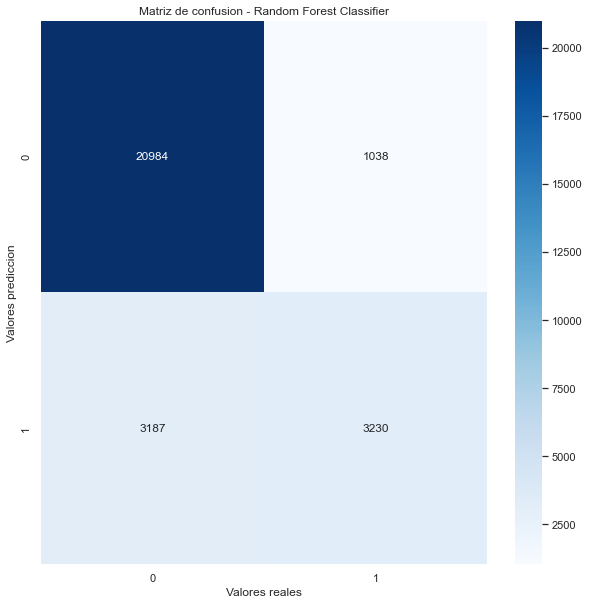

In [54]:
plt.figure(figsize=(10,10))
matriz2 = pd.DataFrame(confusion_matrix(ytest, ypred))
matriz2.index.name = 'Valores prediccion'
matriz2.columns.name = 'Valores reales'
sns.heatmap(matriz2, annot=True,fmt='d',cmap="Blues")
#Matriz de confusion Decision Tree Classification
plt.savefig('MatrizdeconfusionRandomForestClassifier.png')
plt.title("Matriz de confusion - Random Forest Classifier")
plt.show()

La matriz de confusion muestra 24214 datos predichos correctamente (20984 + 3230) y 4734 datos incorrectos (1038 + 3187)

En este caso, se distribuyen de la siguiente manera:

- En 20984 observaciones donde se declaraba que no llovería, el algoritmo predijo correctamente que no llovería.


- En 3230 observaciones donde el resultado era que llovería, el algoritmo predijo correctamente que llovería


- En 3187 observaciones donde se declaraba que no llovería, el algoritmo predijo incorrectamente que llovería

## Curva ROC - Random Forest Classifier

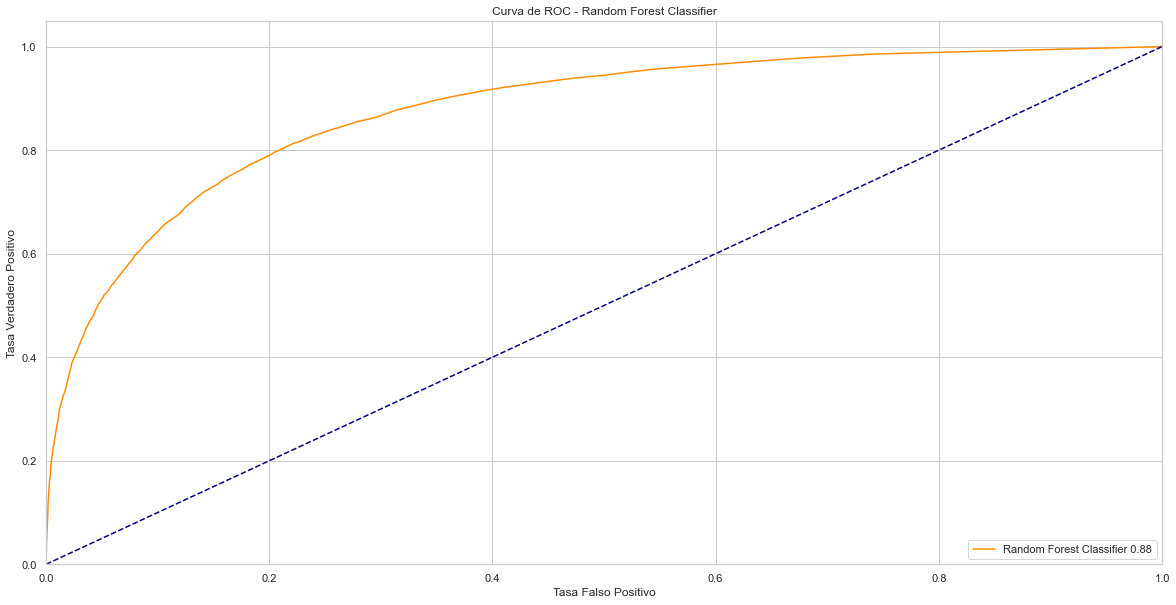

<Figure size 1440x720 with 0 Axes>

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
plt.rcParams["figure.figsize"] = (20,10)
def plot_curve(model, X_test, y_test,score, model_label):
   
    #función para trazar la curva roc para el modelo dado 
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa Falso Positivo')
    plt.ylabel('Tasa Verdadero Positivo')
    plt.title('Curva de ROC - Random Forest Classifier')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc2 random forest.png')
   
plot_curve(rf, XtestSTD, ytest, grid_search1.best_score_, "Random Forest Classifier")

## 5.3.- Regresion Logistica

In [56]:
lr = LogisticRegression(random_state=0)
parameters = {'penalty': ['l1', 'l2'],
              'fit_intercept':[True, False]
             }
grid_search2 = GridSearchCV(estimator=lr, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=10, n_jobs=-1)
grid_search2 = grid_search2.fit(XtrainSTD, ytrain.values.ravel())

## Metricas - Regresion Logistica

In [57]:
print("Best Parameters : ",grid_search2.best_params_)
print("Best AUC-ROC : ", grid_search2.best_score_)

Best Parameters :  {'fit_intercept': True, 'penalty': 'l2'}
Best AUC-ROC :  0.8623475179293376


In [58]:
lr = LogisticRegression(fit_intercept=True, penalty='l2', random_state=0)
lr.fit(XtrainSTD, ytrain)
ypred2 = lr.predict(XtestSTD)
roc_score = roc_auc_score(ypred2, ytest)
accu_lr = accuracy_score(ypred2, ytest)
prec_lr = precision_score(ytest, ypred2)
print ("Precision del Modelo:",prec_lr)                        
print("Accuracy del modelo :",accu_lr)


Precision del Modelo: 0.7303966789667896
Accuracy del modelo : 0.8446147895495623


- La precision puede ser definida como el porcentaje de resultados positivos predecidos correctamente de todos los resultados positivos, es decir el modelo tuvo un 73% de exito al predecir los resultados positivos correctamente.


- El accuracy indica el porcentaje de predicciones correctas respecto al total de observaciones, en este caso el modelo obtuvo un 84% de predicciones correctas con respecto al total de predicciones realizadas.


## Matriz de Confusion - Regresion Logistica

In [59]:
matriz3 = confusion_matrix(ytest, ypred2)
print('Matriz de confusion:')
print(matriz3)

Matriz de confusion:
[[20853  1169]
 [ 3250  3167]]


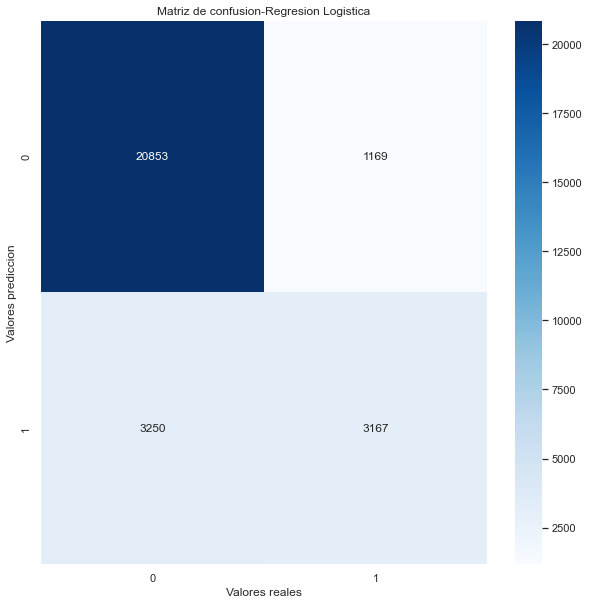

In [60]:
plt.figure(figsize=(10,10))
matriz3 = pd.DataFrame(confusion_matrix(ytest, ypred2))
matriz3.index.name = 'Valores prediccion'
matriz3.columns.name = 'Valores reales'
sns.heatmap(matriz3, annot=True,fmt='d',cmap="Blues")
plt.savefig('MatrizConfusionlogisticregression.png')
plt.title("Matriz de confusion-Regresion Logistica")
plt.show()

La matriz de confusion muestra 24.020 datos predichos correctamente (20853 + 3167) y 4419 datos incorrectos (1169 + 3250)

En este caso, se distribuyen de la siguiente manera:
- En 24020 observaciones donde se declaraba que no llovería, el algoritmo predijo correctamente que no llovería.


- En 3167 observaciones donde el resultado era que llovería, el algoritmo predijo correctamente que llovería


- En 3250 observaciones donde se declaraba que no llovería, el algoritmo predijo incorrectamente que llovería

## Curva de ROC - Regresion Logistica

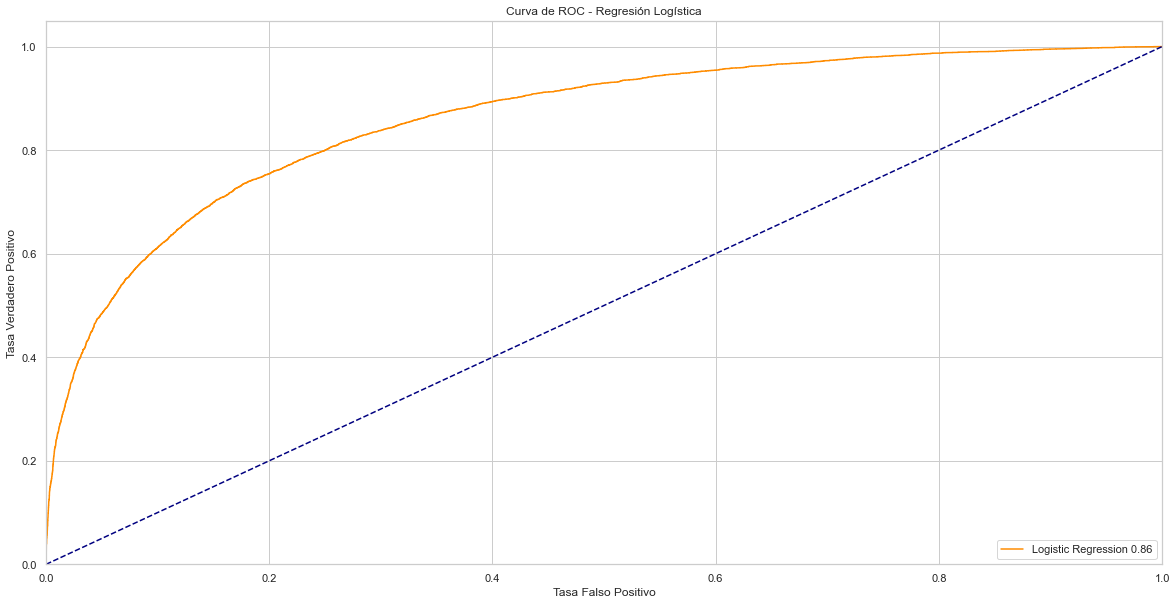

<Figure size 1440x720 with 0 Axes>

In [61]:
def plot_curve(model, X_test, y_test,score, model_label):
    
    # function to plot roc curve for the given model
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa Falso Positivo')
    plt.ylabel('Tasa Verdadero Positivo')
    plt.title('Curva de ROC - Regresión Logística')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc3 logistic regression.png')
    
plot_curve(lr, XtestSTD, ytest, grid_search2.best_score_, "Logistic Regression")

### Comprobando si existe overfitting o underfitting 

In [62]:
print(lr.score(XtrainSTD,ytrain))
print(lr.score(XtestSTD,ytest))

0.8454999384637024
0.8446147895495623


El accuracy obtenido tanto como en entrenamiento como en testing no difiere mucho una de otra, por lo tanto podemos descartar el overfitting. El valor es superior al 50%, por lo tanto podemos descartar el underfitting.

# 5.4 DecisionTreeClassification

Para este algoritmo, se necesita definir la profundidad de las ramas, ya que si el algoritmo presenta una profundidad muy alta puede ocurrir overfitting y si es muy baja underfitting. Para esto, la profundidad utilizada sera de 5, ya que se realizaron pruebas externas con distintos valores para ver el resultado que entregan, estos varian en el tiempo de respuesta y el accuracy de nuestro modelo ( Si se utiliza un mayor valor de profundidad pero sin que este caiga en el overfitting, se obtiene una mayor accuracy, pero a cambio de un mayor tiempo de respuesta) y con el nivel de profundidad seleccionado, se obtienen resultados aceptables para este análisis.

Ademas, el arbol generado por este algoritmo esta compuesto por nodos y estos son elegidos buscando la division óptima de las caracteristicas, para esto utilizaremos un hiperparametro (criterion), el cual nos permite usar 2 opciones "gini" o "entropy". Hemos decidido utilzar "entropy", ya que se busca obtener resultados precisos y este hiperparametro entrega mejores resultados que su contraparte a la hora de dividir las caracteristicas a cambio de tiempo y velocidad.

In [63]:
from sklearn.tree import DecisionTreeClassifier
# Creacion del modelo
modelo = DecisionTreeClassifier(random_state=11,max_depth=5, criterion='entropy')
# Entrenar el modelo
modelo.fit(XtrainSTD, ytrain)
# Validacion del modelo
ypred3 = modelo.predict(XtestSTD)

## Metricas - DecisionTreeClassification

In [64]:
from sklearn.metrics import precision_score, accuracy_score
acc_dtc = accuracy_score(ytest, ypred3)
prec_dtc = precision_score(ytest, ypred3)
print('Precision del modelo: ', prec_dtc)
print('Accuracy del modelo: ', acc_dtc)

Precision del modelo:  0.7217391304347827
Accuracy del modelo:  0.833538450719083


- La precision puede ser definida como el porcentaje de resultados positivos predecidos correctamente de todos los resultados positivos, es decir el modelo tuvo un 72% de exito al predecir los resultados positivos correctamente.


- El accuracy indica el porcentaje de predicciones correctas respecto al total de observaciones, en este caso el modelo obtuvo un 83% de predicciones correctas con respecto al total de predicciones realizadas.

Profundidad del árbol: 5
Número de nodos terminales: 32


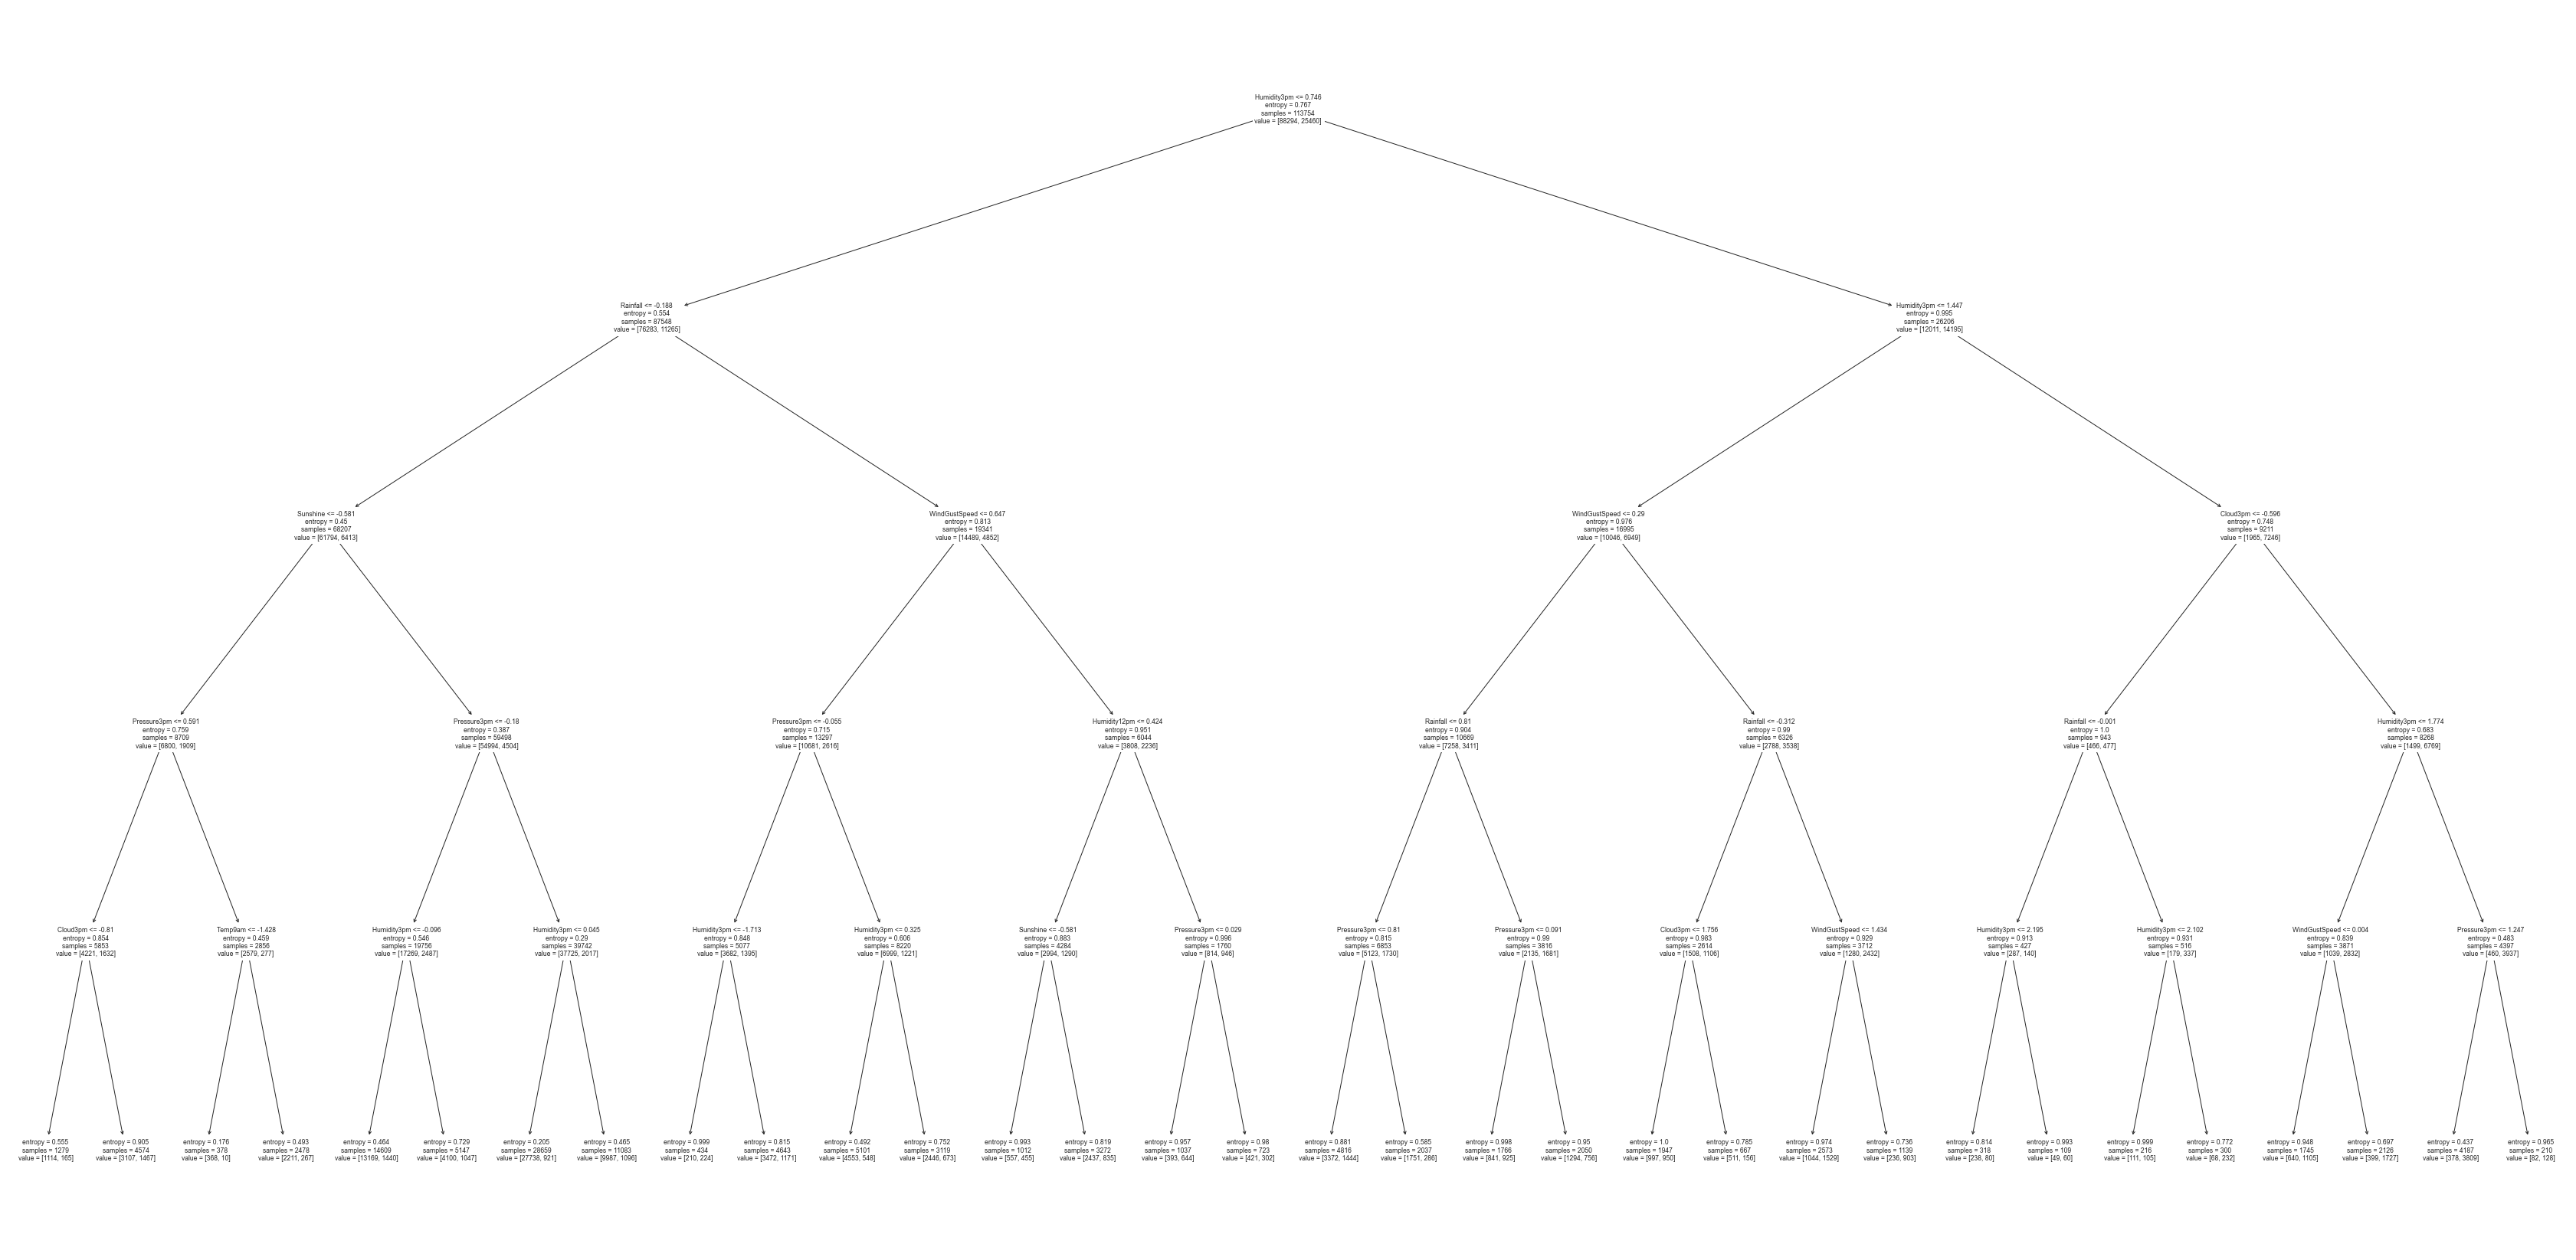

In [65]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(60, 30))

print(f"Profundidad del árbol: {modelo.get_depth()}") 

print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = 
                 modelo,feature_names = X.columns)
plt.savefig('tree.png')
plt.show()

## Matriz de Confusion - DecisionTreeClassification

In [66]:
matriz = confusion_matrix(ytest, ypred3)
print('Matriz de confusion:')
print(matriz)

Matriz de confusion:
[[20966  1056]
 [ 3678  2739]]


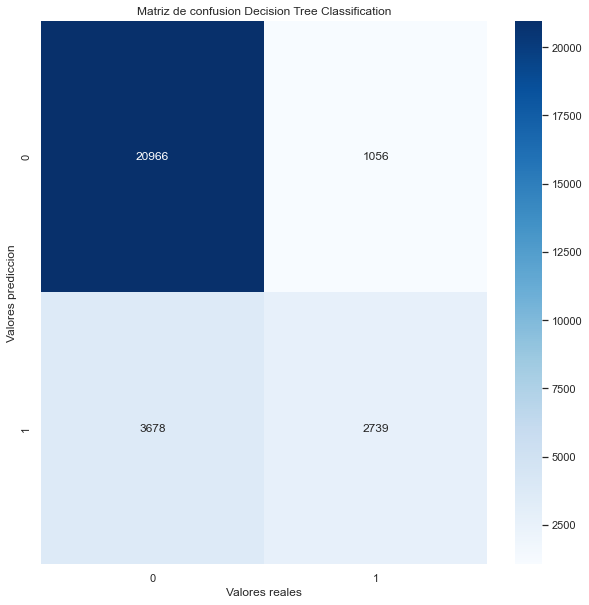

In [67]:
plt.figure(figsize=(10,10))
matriz = pd.DataFrame(confusion_matrix(ytest, ypred3))
matriz.index.name = 'Valores prediccion'
matriz.columns.name = 'Valores reales'
sns.heatmap(matriz, annot=True,fmt='d',cmap="Blues")
plt.savefig('MatrizdeconfusionDecisionTreeClassification.png')
plt.title("Matriz de confusion Decision Tree Classification")
plt.show()

La matriz de confusion muestra 23705 datos predichos correctamente (20966 + 2739) y 4734 datos incorrectos (1056 + 3678)

En este caso, se distribuyen de la siguiente manera:
- En 20966 observaciones donde se declaraba que no llovería, el algoritmo predijo correctamente que no llovería.


- En 2739 observaciones donde el resultado era que llovería, el algoritmo predijo correctamente que llovería


- En 3678 observaciones donde se declaraba que no llovería, el algoritmo predijo incorrectamente que llovería

## Curva de ROC - DecisionTreeClassification

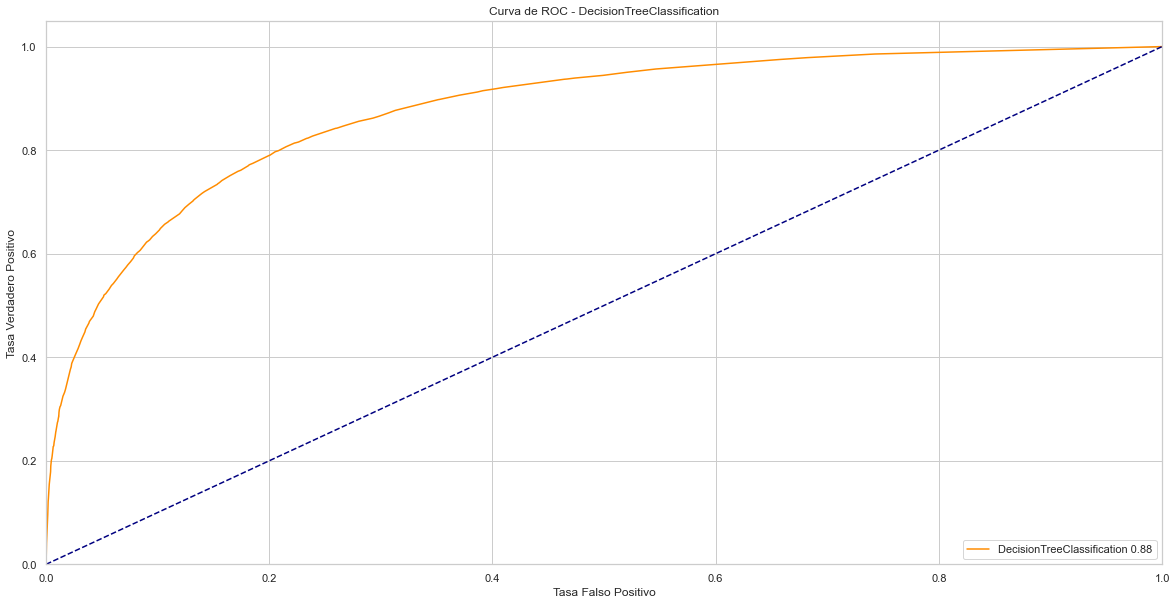

<Figure size 1440x720 with 0 Axes>

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
plt.rcParams["figure.figsize"] = (20,10)
def plot_curve(model, X_test, y_test,score, model_label):
   
    #función para trazar la curva roc para el modelo dado 
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa Falso Positivo')
    plt.ylabel('Tasa Verdadero Positivo')
    plt.title('Curva de ROC - DecisionTreeClassification')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc DecisionTreeClassification.png')
   
plot_curve(rf, XtestSTD, ytest, grid_search1.best_score_, "DecisionTreeClassification")

### Comprobando si existe overfitting o underfitting 

In [69]:
print(modelo.score(XtrainSTD,ytrain))
print(modelo.score(XtestSTD,ytest))

0.8372452836823321
0.833538450719083


# 6.- CONCLUSIÓN

## Comparando los modelos

In [70]:
df_result = pd.DataFrame({'Modelos': ['DecisionTreeClassification','RandomForestClassifier','LogisticRegression'],
                          'Accuracy del modelo':[acc_dtc,accu_rf,accu_lr],
                          'Precision del modelo': [prec_dtc,prec_rf,prec_lr]
                         })
df_result

,Modelos,Accuracy del modelo,Precision del modelo
0,DecisionTreeClassification,0.833538,0.721739
1,RandomForestClassifier,0.851436,0.756795
2,LogisticRegression,0.844615,0.730397


### Como se observa, el modelo con el algoritmo RandomForestClassifier obtuvo mejores resultados, con un score de accuracy cercana al 85% y una precision del 75%. Por lo tanto, podemos concluir que el modelo tiene un buen desempeño a la hora de predecir si llovera al dia siguiente. 
### Los resultados de los algoritmos se pueden mejorar para conseguir resultados mejores. por ejemplo, Balancear los datos, la variable RainTomorrow tiene una gran cantidad de observaciones con resultado de que no llovera al dia siguiente y solo una pequeña parte tiene como resultado que si llovera. Esto puede generar una tendencia en el algoritmo que favorecera al resultado con mayor observaciones. A continuacion, se incluira un grafico que demuestra lo comentado anteriormente.

### Demostración del desbalance de los datos

,Cantidad,Porcentaje
No,110316,77.581878
Yes,31877,22.418122


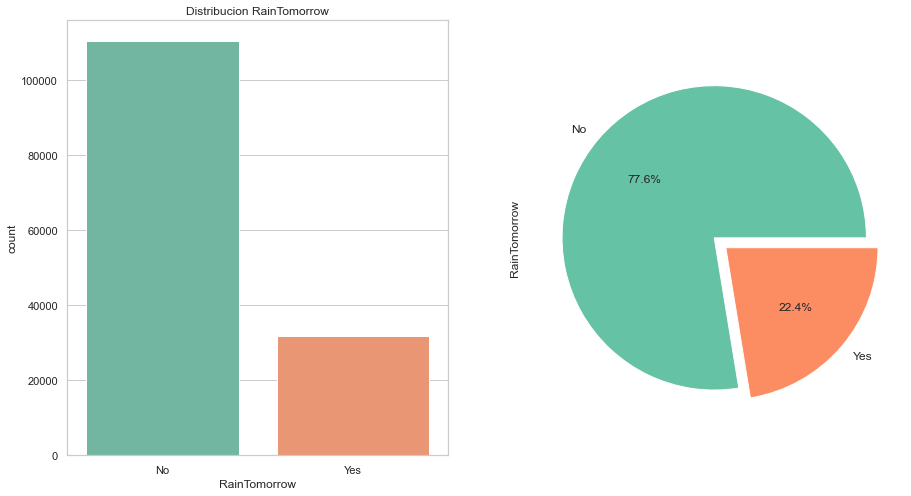

In [71]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Distribucion RainTomorrow')
x=sns.countplot(x=data['RainTomorrow'], palette='Set2')

plt.subplot(1,2,2)
data['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0.1],textprops={'fontsize': 12}, 
                                                   colors=['#66c2a5','#fc8d62'])

pd.DataFrame({'Cantidad': data['RainTomorrow'].value_counts(),
              'Porcentaje': (data['RainTomorrow'].value_counts()/data.shape[0] * 100) })